# Assingment 1

In [8]:
import tensorflow as tf
AUTOTUNE = tf.data.experimental.AUTOTUNE
import numpy as np
import pandas as pd

import os
import tensorflow_datasets as tfds
import pathlib
import shutil
import tempfile

from  IPython import display
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

In [2]:
train_df = pd.read_csv('train_data.csv')
pd.set_option('display.max_columns', None) 
train_df.head(10)

filename  person_id  series  tilt  pan
0   face_790.jpg          5       1   -15   30
1  face_2445.jpg          5       1     0  -75
2  face_2266.jpg          5       2   -15  -60
3  face_2713.jpg          5       2     0  -90
4  face_2016.jpg          5       2    15  -75
5  face_2522.jpg          5       1    30   60
6  face_1254.jpg          5       2    15  -15
7  face_2754.jpg          5       1    15  -45
8   face_201.jpg          5       2    30  -90
9   face_931.jpg          5       1    15  -30

In [3]:
test_df = pd.read_csv('test_data.csv')
test_df.head(10)

filename  person_id  series
0    face_33.jpg          2       1
1  face_2148.jpg          2       2
2  face_2119.jpg          2       1
3  face_1262.jpg          2       1
4   face_516.jpg          2       2
5  face_1530.jpg          2       2
6   face_464.jpg          2       2
7  face_1971.jpg          2       1
8    face_92.jpg          2       1
9   face_921.jpg          2       2

In [4]:
first_column_train_df = train_df.iloc[:, 0]
first_column_test_df = test_df.iloc[:, 0]
print(first_column_train_df)

0        face_790.jpg
1       face_2445.jpg
2       face_2266.jpg
3       face_2713.jpg
4       face_2016.jpg
            ...      
2320    face_1977.jpg
2321     face_701.jpg
2322    face_1343.jpg
2323     face_851.jpg
2324     face_870.jpg
Name: filename, Length: 2325, dtype: object


In [6]:
# tempdir = pathlib.Path(tempfile.mkdtemp())
# print(tempdir)

train_images_loc = '/Users/milind/OneDrive - RMIT University/sem3/DL/DL-Assingment-1/train_images/'
test_images_loc = '/Users/milind/OneDrive - RMIT University/sem3/DL/DL-Assingment-1/test_images/'

src = 'modified_data'
curr_dir = os.listdir(src)

for file_name in first_column_train_df:
    full_file_name = os.path.join(src, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, train_images_loc)
        
for file_name in first_column_test_df:
    full_file_name = os.path.join(src, file_name)
    if os.path.isfile(full_file_name):
        shutil.copy(full_file_name, test_images_loc)

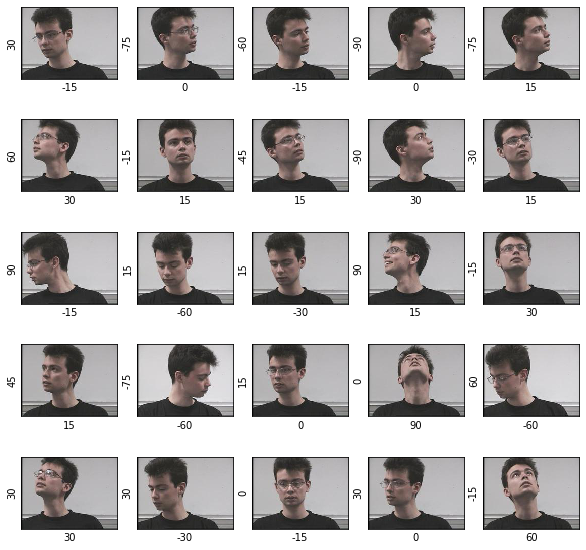

In [31]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid()
    image = mpimg.imread(train_images_loc+first_column_train_df[i]) # images are color images
    plt.imshow(image)
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel(train_df['tilt'].iloc[i])
    plt.ylabel(train_df['pan'].iloc[i])
plt.show()

In [ ]:
shutil.rmtree('/Users/milind/OneDrive - RMIT University/sem3/DL/DL-Assingment-1/train_images/')
shutil.rmtree('/Users/milind/OneDrive - RMIT University/sem3/DL/DL-Assingment-1/test_images/')